# Empirical Orthogonal Function 

## Parameter

+ data (np.ndarray): shape (time, * space grid number)

+ weights : shape (* space grid number , 
    or can be broadcast to space grid number)

## Method

+ solve: solve the EOF results 

+ get_pc(npt): get princple components of first npt modes

+ get_pt(npt): get spatial patterns of first npt modes

+ get_eign: get eign values of EOF result

+ get_varperc: get the proportion of mode variance

## Example

### load Modules

In [2]:
import sacpy as scp
import numpy as np
import matplotlib.pyplot as plt

### Get SST and SSTA data

In [3]:
sst = scp.load_sst()["sst"].loc[:, -20:30, 150:275]
ssta = scp.get_anom(sst)

### EOF Calcualtion

In [4]:
eof = scp.EOF(ssta)
eof.solve()

### Get EOF result

In [5]:
# get pc and pattern
pc = eof.get_pc(npt=2)
pt = eof.get_pt(npt=2)
# get proprtion of mode variance
eof.get_varperc(npt=3)

array([0.5370137 , 0.13356638, 0.0657487 ])

### Plot the EOF Results

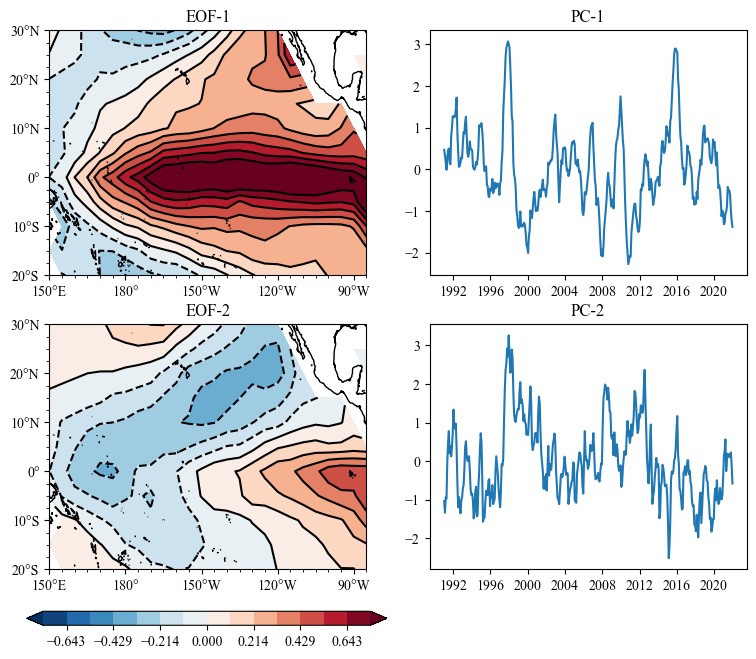

In [6]:
import cartopy.crs as ccrs
import sacpy.Map
lon , lat = ssta.lon , ssta.lat
# =========================set figure================================
fig = plt.figure(figsize=[9,7])
# =========================     ax  ================================
ax = fig.add_subplot(221,projection=ccrs.PlateCarree(central_longitude=180))
m1 = ax.scontourf(lon,lat,pt[0,:,:],cmap='RdBu_r',levels=np.linspace(-0.75,0.75,15),extend="both")
ax.scontour(m1,colors="black")
ax.init_map(smally=2.5)
ax.set_title("EOF-1")
# =========================    ax2  ================================
ax2 = fig.add_subplot(222)
ax2.plot(sst.time,pc[0])
ax2.set_title("PC-1")
# =========================    ax3  ================================
ax3 = fig.add_subplot(223,projection=ccrs.PlateCarree(central_longitude=180))
m2 = ax3.scontourf(lon,lat,pt[1,:,:],cmap='RdBu_r',levels=np.linspace(-0.75,0.75,15),extend="both")
ax3.scontour(m2,colors="black")
ax3.init_map(smally=2.5)
ax3.set_title("EOF-2")
# =========================   ax4   ================================
ax4 = fig.add_subplot(224)
ax4.plot(sst.time,pc[1])
ax4.set_title("PC-2")
# =========================  colorbar  ================================
cb_ax = fig.add_axes([0.1,0.03,0.4,0.02])
fig.colorbar(m1,cax=cb_ax,orientation="horizontal")